In [1]:
apikey = 'YOURAPIKEY'
secret = 'YOURAPISECRET'

In [2]:
%pip install python-binance pandas mplfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

In [4]:
client = Client(apikey, secret)
print(client)

In [5]:
tickers = client.get_all_tickers()

In [6]:
tickers

[{'symbol': 'ETHBTC', 'price': '0.03892000'},
 {'symbol': 'LTCBTC', 'price': '0.00120500'},
 {'symbol': 'BNBBTC', 'price': '0.00706900'},
 {'symbol': 'NEOBTC', 'price': '0.00018650'},
 {'symbol': 'QTUMETH', 'price': '0.00109000'},
 {'symbol': 'EOSETH', 'price': '0.00028530'},
 {'symbol': 'SNTETH', 'price': '0.00001476'},
 {'symbol': 'BNTETH', 'price': '0.00023110'},
 {'symbol': 'BCCBTC', 'price': '0.00000000'},
 {'symbol': 'GASBTC', 'price': '0.00005930'},
 {'symbol': 'BNBETH', 'price': '0.18170000'},
 {'symbol': 'BTCUSDT', 'price': '101374.09000000'},
 {'symbol': 'ETHUSDT', 'price': '3945.88000000'},
 {'symbol': 'HSRBTC', 'price': '0.00000000'},
 {'symbol': 'OAXETH', 'price': '0.00000000'},
 {'symbol': 'DNTETH', 'price': '0.00000000'},
 {'symbol': 'MCOETH', 'price': '0.00000000'},
 {'symbol': 'ICNETH', 'price': '0.00000000'},
 {'symbol': 'MCOBTC', 'price': '0.00000000'},
 {'symbol': 'WTCBTC', 'price': '0.00000024'},
 {'symbol': 'WTCETH', 'price': '0.00000000'},
 {'symbol': 'LRCBTC', '

In [7]:
tickers[1]['price']

'0.00120500'

In [8]:
ticker_df = pd.DataFrame(tickers)

In [9]:
ticker_df.head()

,symbol,price
0,ETHBTC,0.03892000
1,LTCBTC,0.00120500
2,BNBBTC,0.00706900
3,NEOBTC,0.00018650
4,QTUMETH,0.00109000


In [10]:
ticker_df.set_index('symbol',inplace=True)

In [11]:
float(ticker_df.loc['ETHBTC']['price'])

0.03892

In [12]:
depth=client.get_order_book(symbol='BTCUSDT')

In [13]:
depth

{'lastUpdateId': 56391051433,
 'bids': [['101414.95000000', '1.10915000'],
  ['101414.91000000', '0.00010000'],
  ['101414.90000000', '0.00010000'],
  ['101414.89000000', '0.00010000'],
  ['101414.48000000', '0.00010000'],
  ['101414.34000000', '0.00010000'],
  ['101414.33000000', '0.00010000'],
  ['101414.19000000', '0.00010000'],
  ['101414.18000000', '0.00010000'],
  ['101414.17000000', '0.00016000'],
  ['101414.16000000', '0.21234000'],
  ['101414.15000000', '0.19722000'],
  ['101414.00000000', '0.00010000'],
  ['101413.87000000', '0.00010000'],
  ['101413.86000000', '0.00010000'],
  ['101413.60000000', '0.00010000'],
  ['101413.54000000', '0.00010000'],
  ['101413.53000000', '0.00010000'],
  ['101413.52000000', '0.00015000'],
  ['101412.01000000', '0.00034000'],
  ['101412.00000000', '0.09940000'],
  ['101411.98000000', '0.01584000'],
  ['101411.85000000', '0.00022000'],
  ['101411.76000000', '0.04841000'],
  ['101411.30000000', '0.00011000'],
  ['101410.86000000', '0.00011000'],


In [14]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price','Volume']
depth_df.head()


,Price,Volume
0,101414.96000000,0.79609000
1,101414.97000000,0.00016000
2,101414.98000000,0.00010000
3,101414.99000000,0.00016000
4,101415.00000000,0.00016000


In [15]:
depth_df.tail()

,Price,Volume
95,101438.49000000,0.00985000
96,101438.78000000,0.06864000
97,101438.87000000,0.00005000
98,101438.88000000,0.14795000
99,101438.96000000,0.59151000


In [16]:
depth_df.dtypes

Price     object
Volume    object
dtype: object

5.Get Historical Data

In [ ]:
# [
# [
# 1499040000000, // Open time
# "0.01634790", // Open
# "0.80000000", // High
# "0.01575800", // Low
# "0.01577100", // Close
# "148976.11427815", // Volume
# 1499644799999, // Close time
# "2434.19055334", // Quote asset volume
# 308, // Number of trades
# "1756.87402397", // Taker buy base asset volume
# "28.46694368", // Taker buy quote asset volume
# "17928899.62484339" // Ignore.
# ]
# ]


In [17]:
client.get_historical_klines??

Signature:
client.get_historical_klines(
    symbol,
    interval,
    start_str=None,
    end_str=None,
    limit=None,
    klines_type: binance.enums.HistoricalKlinesType = <HistoricalKlinesType.SPOT: 1>,
)
Source:   
    def get_historical_klines(
        self,
        symbol,
        interval,
        start_str=None,
        end_str=None,
        limit=None,
        klines_type: HistoricalKlinesType = HistoricalKlinesType.SPOT,
    ):
        """Get Historical Klines from Binance

        :param symbol: Name of symbol pair e.g. BNBBTC
        :type symbol: str
        :param interval: Binance Kline interval
        :type interval: str
        :param start_str: optional - start date string in UTC format or timestamp in milliseconds
        :type start_str: str|int
        :param end_str: optional - end date string in UTC format or timestamp in milliseconds (default will fetch everything up to now)
        :type end_str: str|int
        :param limit: Default 1000; max 1000.
        :

In [18]:
historical = client.get_historical_klines(
    'ETHBTC',
    Client.KLINE_INTERVAL_1MINUTE,
    '11 day ago UTC'
)

In [19]:
historical

[[1733075580000,
  '0.03824000',
  '0.03825000',
  '0.03822000',
  '0.03822000',
  '19.16610000',
  1733075639999,
  '0.73292398',
  82,
  '2.92390000',
  '0.11183199',
  '0'],
 [1733075640000,
  '0.03822000',
  '0.03825000',
  '0.03822000',
  '0.03824000',
  '17.67050000',
  1733075699999,
  '0.67555742',
  55,
  '17.49410000',
  '0.66881260',
  '0'],
 [1733075700000,
  '0.03825000',
  '0.03826000',
  '0.03824000',
  '0.03826000',
  '6.72730000',
  1733075759999,
  '0.25731937',
  27,
  '6.72340000',
  '0.25717024',
  '0'],
 [1733075760000,
  '0.03826000',
  '0.03826000',
  '0.03823000',
  '0.03823000',
  '7.73840000',
  1733075819999,
  '0.29594377',
  58,
  '0.69550000',
  '0.02659844',
  '0'],
 [1733075820000,
  '0.03823000',
  '0.03826000',
  '0.03823000',
  '0.03824000',
  '11.48970000',
  1733075879999,
  '0.43946489',
  106,
  '9.35570000',
  '0.35785385',
  '0'],
 [1733075880000,
  '0.03825000',
  '0.03825000',
  '0.03824000',
  '0.03824000',
  '3.18450000',
  1733075939999,
 

In [20]:
hist_df = pd.DataFrame(historical)
hist_df.shape

(15841, 12)

In [21]:
hist_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1733075580000,0.03824000,0.03825000,0.03822000,0.03822000,19.16610000,1733075639999,0.73292398,82,2.92390000,0.11183199,0
1,1733075640000,0.03822000,0.03825000,0.03822000,0.03824000,17.67050000,1733075699999,0.67555742,55,17.49410000,0.66881260,0
2,1733075700000,0.03825000,0.03826000,0.03824000,0.03826000,6.72730000,1733075759999,0.25731937,27,6.72340000,0.25717024,0
3,1733075760000,0.03826000,0.03826000,0.03823000,0.03823000,7.73840000,1733075819999,0.29594377,58,0.69550000,0.02659844,0
4,1733075820000,0.03823000,0.03826000,0.03823000,0.03824000,11.48970000,1733075879999,0.43946489,106,9.35570000,0.35785385,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15836,1734025740000,0.03890000,0.03890000,0.03889000,0.03890000,7.14470000,1734025799999,0.27792455,38,6.71750000,0.26131075,0
15837,1734025800000,0.03890000,0.03891000,0.03889000,0.03891000,7.05210000,1734025859999,0.27436537,79,6.55530000,0.25504453,0
15838,1734025860000,0.03891000,0.03893000,0.03891000,0.03892000,9.25910000,1734025919999,0.36036570,73,7.17370000,0.27920240,0
15839,1734025920000,0.03891000,0.03893000,0.03891000,0.03892000,2.35760000,1734025979999,0.09175652,40,1.13410000,0.04413917,0


In [22]:
hist_df.columns = [
    'Open Time', 'Open', 'High', 'Low', 'Close', 'Volume',
    'Close Time', 'Quote Asset Volume', 'Number of Trades',
    'TB Base Volume', 'TB Quote Volume', 'Ignore'
]

In [23]:
hist_df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1733075580000,0.03824000,0.03825000,0.03822000,0.03822000,19.16610000,1733075639999,0.73292398,82,2.92390000,0.11183199,0
1,1733075640000,0.03822000,0.03825000,0.03822000,0.03824000,17.67050000,1733075699999,0.67555742,55,17.49410000,0.66881260,0
2,1733075700000,0.03825000,0.03826000,0.03824000,0.03826000,6.72730000,1733075759999,0.25731937,27,6.72340000,0.25717024,0
3,1733075760000,0.03826000,0.03826000,0.03823000,0.03823000,7.73840000,1733075819999,0.29594377,58,0.69550000,0.02659844,0
4,1733075820000,0.03823000,0.03826000,0.03823000,0.03824000,11.48970000,1733075879999,0.43946489,106,9.35570000,0.35785385,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15836,1734025740000,0.03890000,0.03890000,0.03889000,0.03890000,7.14470000,1734025799999,0.27792455,38,6.71750000,0.26131075,0
15837,1734025800000,0.03890000,0.03891000,0.03889000,0.03891000,7.05210000,1734025859999,0.27436537,79,6.55530000,0.25504453,0
15838,1734025860000,0.03891000,0.03893000,0.03891000,0.03892000,9.25910000,1734025919999,0.36036570,73,7.17370000,0.27920240,0
15839,1734025920000,0.03891000,0.03893000,0.03891000,0.03892000,2.35760000,1734025979999,0.09175652,40,1.13410000,0.04413917,0


In [25]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [32]:
hist_df.isna().sum()

Open Time             0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Close Time            0
Quote Asset Volume    0
Number of Trades      0
TB Base Volume        0
TB Quote Volume       0
Ignore                0
dtype: int64

In [33]:
hist_df.duplicated().sum()

0

In [34]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15841 entries, 0 to 15840
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           15841 non-null  datetime64[ns]
 1   Open                15841 non-null  object        
 2   High                15841 non-null  object        
 3   Low                 15841 non-null  object        
 4   Close               15841 non-null  object        
 5   Volume              15841 non-null  object        
 6   Close Time          15841 non-null  datetime64[ns]
 7   Quote Asset Volume  15841 non-null  object        
 8   Number of Trades    15841 non-null  int64         
 9   TB Base Volume      15841 non-null  object        
 10  TB Quote Volume     15841 non-null  object        
 11  Ignore              15841 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 1.5+ MB


In [35]:
hist_df.nunique()

Open Time             15841
Open                    363
High                    359
Low                     364
Close                   361
Volume                15634
Close Time            15841
Quote Asset Volume    15833
Number of Trades       1088
TB Base Volume        15073
TB Quote Volume       15676
Ignore                    1
dtype: int64

In [36]:
hist_df.describe()

,Open Time,Close Time,Number of Trades
count,15841,15841,15841.00000
mean,2024-12-07 05:53:00,2024-12-07 05:53:59.999000064,175.83669
min,2024-12-01 17:53:00,2024-12-01 17:53:59.999000064,0.00000
25%,2024-12-04 11:53:00,2024-12-04 11:53:59.999000064,48.00000
50%,2024-12-07 05:53:00,2024-12-07 05:53:59.999000064,97.00000
75%,2024-12-09 23:53:00,2024-12-09 23:53:59.999000064,192.00000
max,2024-12-12 17:53:00,2024-12-12 17:53:59.999000064,18956.00000
std,NaN,NaN,333.73777


In [38]:

hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2024-12-01 17:53:00,0.03824000,0.03825000,0.03822000,0.03822000,19.16610000,2024-12-01 17:53:59.999000064,0.73292398,82,2.92390000,0.11183199,0
1,2024-12-01 17:54:00,0.03822000,0.03825000,0.03822000,0.03824000,17.67050000,2024-12-01 17:54:59.999000064,0.67555742,55,17.49410000,0.66881260,0
2,2024-12-01 17:55:00,0.03825000,0.03826000,0.03824000,0.03826000,6.72730000,2024-12-01 17:55:59.999000064,0.25731937,27,6.72340000,0.25717024,0
3,2024-12-01 17:56:00,0.03826000,0.03826000,0.03823000,0.03823000,7.73840000,2024-12-01 17:56:59.999000064,0.29594377,58,0.69550000,0.02659844,0
4,2024-12-01 17:57:00,0.03823000,0.03826000,0.03823000,0.03824000,11.48970000,2024-12-01 17:57:59.999000064,0.43946489,106,9.35570000,0.35785385,0


In [27]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [39]:
file_path = "hist_data.csv"

In [41]:
hist_df.to_csv('hist_df', index=False)


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

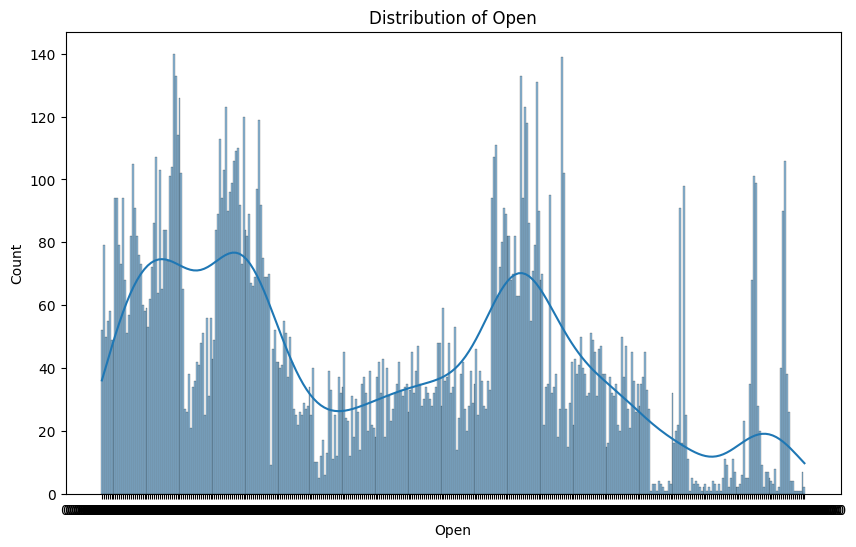

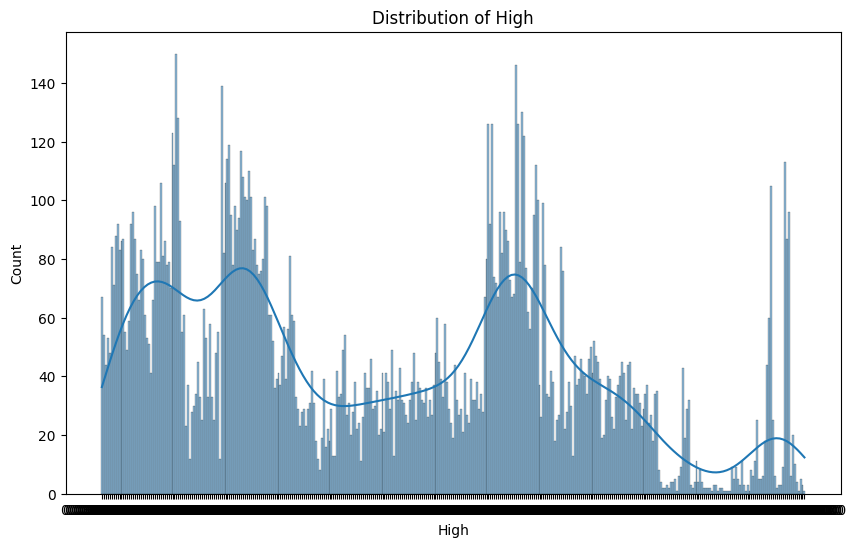

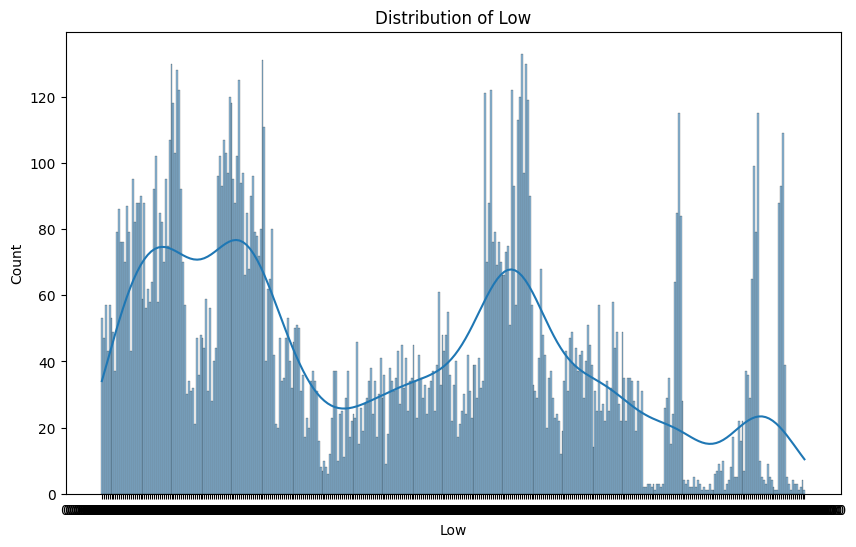

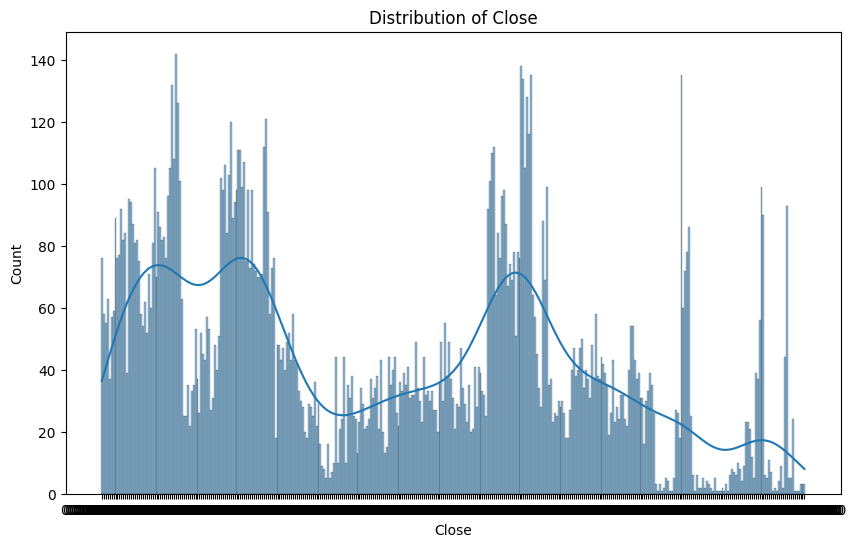

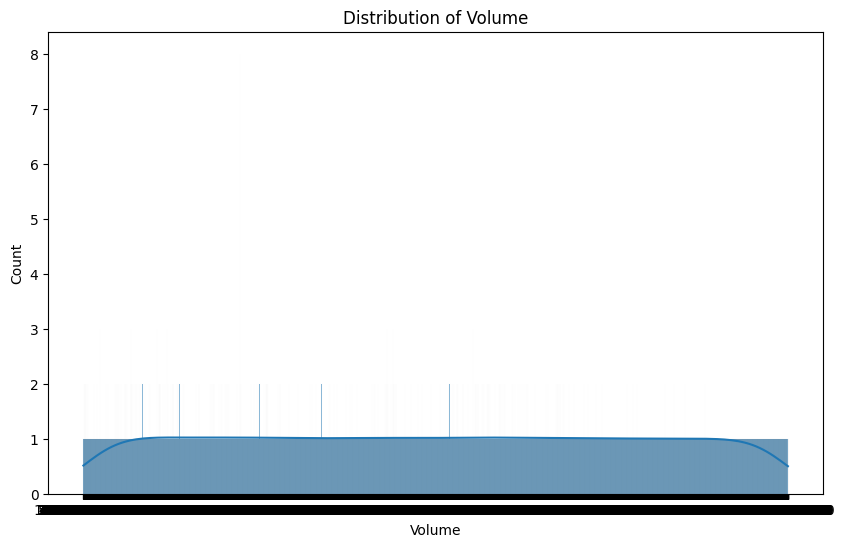

KeyboardInterrupt: 

In [45]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(hist_df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

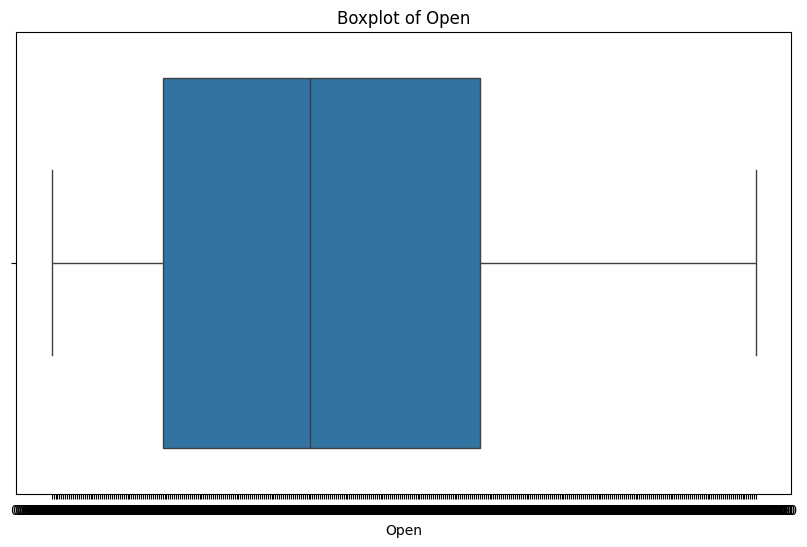

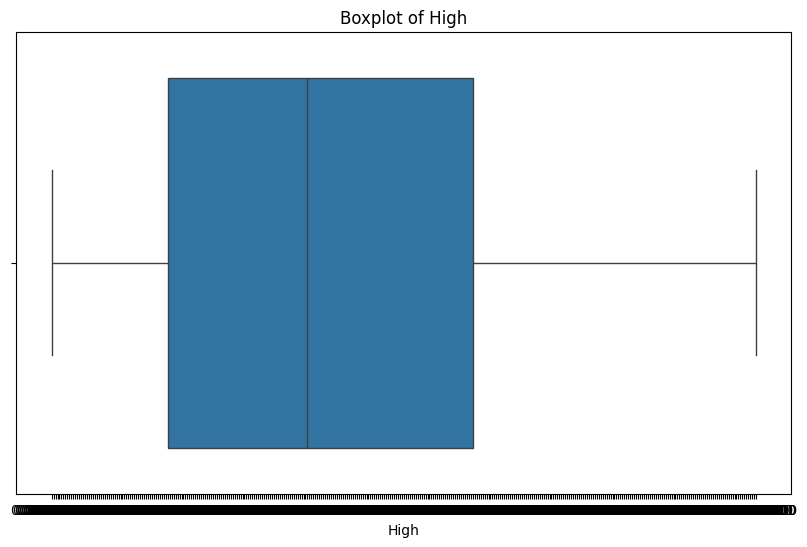

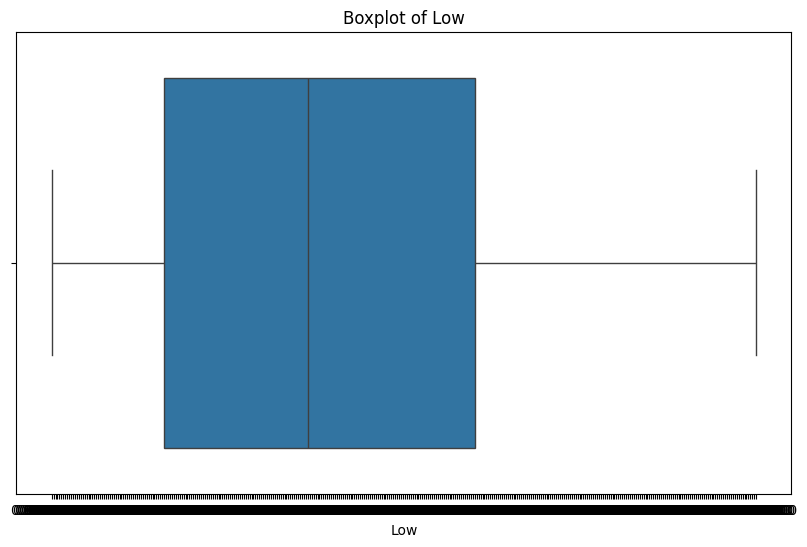

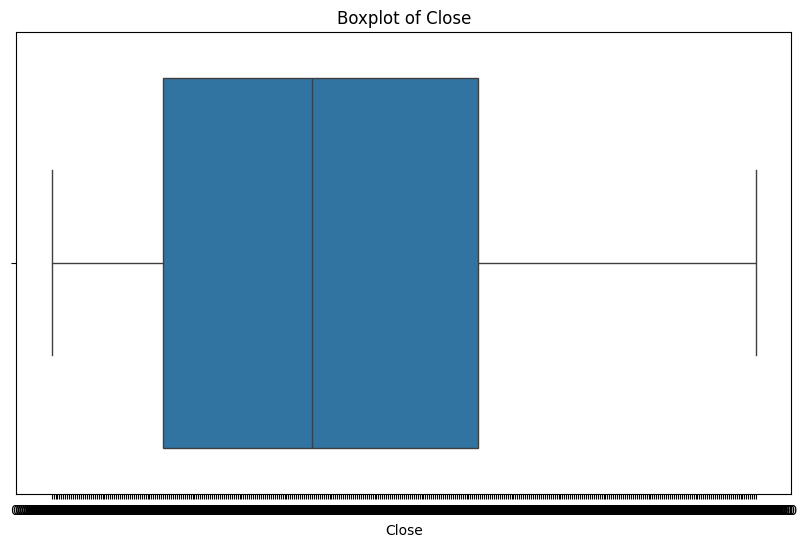

KeyboardInterrupt: 

In [47]:
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=hist_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

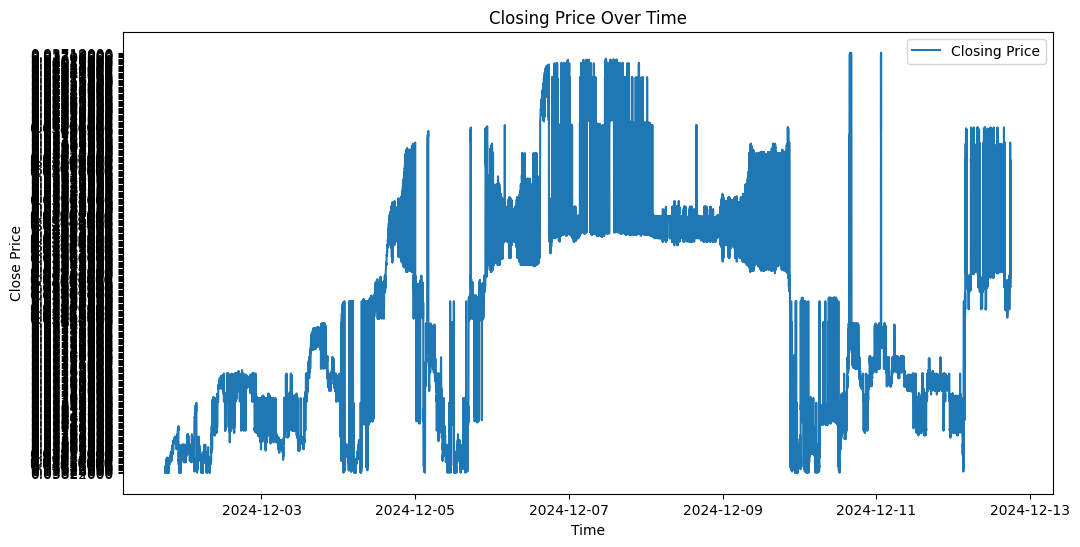

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(hist_df['Open Time'], hist_df['Close'], label='Closing Price')
plt.title("Closing Price Over Time")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()

Ignore
0    15841
Name: count, dtype: int64


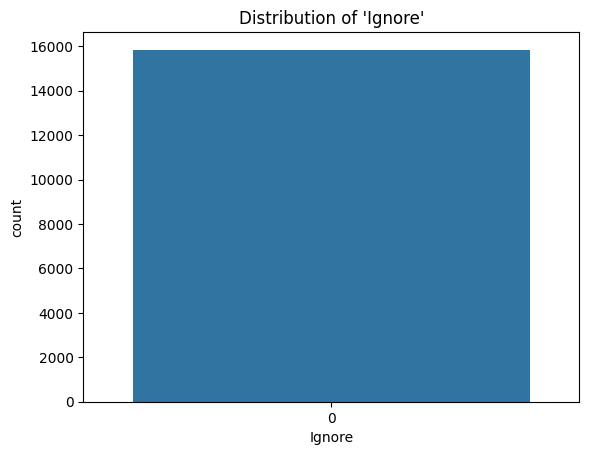

In [56]:
print(hist_df['Ignore'].value_counts())

sns.countplot(x='Ignore', data=hist_df)
plt.title("Distribution of 'Ignore'")
plt.show()

In [79]:
from scipy.stats import zscore

# Select only numeric columns
numeric_columns = hist_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for numeric columns
z_scores = hist_df[numeric_columns].apply(zscore)

# Identify rows with outliers (Z-score > 3)
outliers = (z_scores > 3).any(axis=1)

# Print the number of outlier rows
print(f"Number of outlier rows: {outliers.sum()}")

Number of outlier rows: 192


In [67]:
#  Drop rows with missing values
df_cleaned = hist_df.dropna()

# Or fill missing values with a specific strategy
df_filled = hist_df.fillna(method='ffill')  # Forward fill


In [80]:
hist_df.to_csv("cleaned_hist_data.csv", index=False)
